## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler, Binarizer
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set()
print('Libraries loaded')

Libraries loaded


## 2. Naive Bayes Overview

- Based on Bayes theorem with the "naive" assumption that features are independent.
- GaussianNB: continuous features assumed Gaussian.
- MultinomialNB: count data (e.g., word counts).
- BernoulliNB: binary features.

Pros: fast, low memory, works well with many features and small datasets.
Cons: independence assumption rarely holds; can be outperformed by discriminative models.

## 3. Create Synthetic Face-like Dataset

In [2]:
# We'll create a dataset with 3 classes resembling feature vectors from HOG/LBP
X, y = make_classification(n_samples=600, n_features=40, n_informative=30, 
                           n_redundant=5, n_classes=3, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42, stratify=y)
print('Train samples:', X_train.shape)
print('Test samples:', X_test.shape)

Train samples: (450, 40)
Test samples: (150, 40)


## 4. Gaussian Naive Bayes (continuous features)

In [3]:
gnb = GaussianNB()

# Train and evaluate
gnb.fit(X_train, y_train)
print('Train acc:', gnb.score(X_train, y_train))
print('Test acc: ', gnb.score(X_test, y_test))

# Detailed report
y_pred = gnb.predict(X_test)
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

Train acc: 0.7333333333333333
Test acc:  0.6266666666666667

Classification report:

              precision    recall  f1-score   support

           0       0.57      0.68      0.62        50
           1       0.69      0.66      0.67        50
           2       0.64      0.54      0.59        50

    accuracy                           0.63       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.63      0.63      0.63       150



## 5. Multinomial & Bernoulli NB (require non-negative or binary features)

In [4]:
# Multinomial requires non-negative features. We'll scale to [0, 1] and convert to counts approximation
scaler = MinMaxScaler()
X_train_mm = (scaler.fit_transform(X_train) * 100).astype(int)
X_test_mm = (scaler.transform(X_test) * 100).astype(int)

mnb = MultinomialNB()
mnb.fit(X_train_mm, y_train)
print('MultinomialNB Test acc:', mnb.score(X_test_mm, y_test))

# Bernoulli with binarized features
binarizer = Binarizer(threshold=0.5)
X_train_bin = binarizer.fit_transform(scaler.transform(X_train))
X_test_bin = binarizer.transform(scaler.transform(X_test))

bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)
print('BernoulliNB Test acc:', bnb.score(X_test_bin, y_test))

MultinomialNB Test acc: 0.5733333333333334
BernoulliNB Test acc: 0.5933333333333334


## 6. Cross-validation and Comparison

GaussianNB   Test acc: 0.6267
MultinomialNB Test acc: 0.5733
BernoulliNB  Test acc: 0.5933
KNN          Test acc: 0.7933
SVM          Test acc: 0.8733
RandomForest Test acc: 0.7600


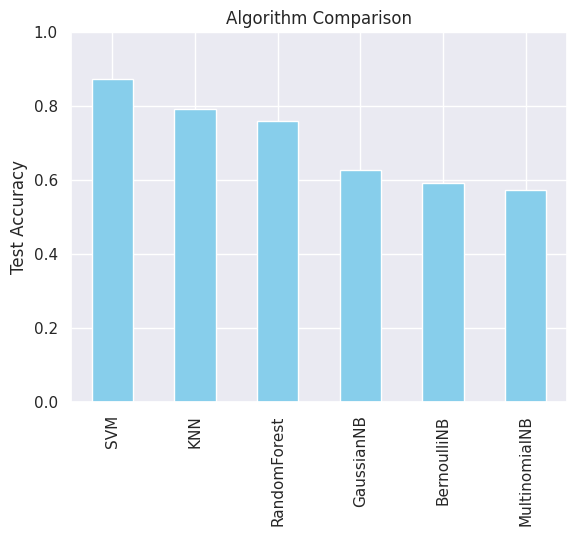

In [5]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Scale for discriminative models
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=False),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    if name in ['KNN', 'SVM']:
        model.fit(X_train_std, y_train)
        score = model.score(X_test_std, y_test)
    elif name == 'RandomForest':
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
    elif name == 'MultinomialNB':
        model.fit(X_train_mm, y_train)
        score = model.score(X_test_mm, y_test)
    elif name == 'BernoulliNB':
        model.fit(X_train_bin, y_train)
        score = model.score(X_test_bin, y_test)
    else:
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name:12s} Test acc: {score:.4f}")

# Display results
pd.Series(results).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Test Accuracy')
plt.title('Algorithm Comparison')
plt.ylim(0, 1)
plt.show()

## 7. Practical Tips for Using Naive Bayes in CV

- GaussianNB works well with continuous descriptors (HOG/LBP) if features approx Gaussian.
- Multinomial/Bernoulli are useful for count or binary features (e.g., bag-of-visual-words).
- NB is fast and good baseline for small datasets.
- Preprocessing matters — scaling and binarization can change suitability.

## 8. Exercises

In [6]:
# Exercise: Try Multinomial with different scaling factors and see effect
# TODO: Change multiplier (100 above) to 10 and 1000, compare accuracies

print('Try scaling factor experiment interactively')

Try scaling factor experiment interactively


## 9. Summary

- Naive Bayes provides quick baselines
- Choose the correct variant for your feature type
- Compare with discriminative models (SVM, RF, NN)

---
**Created for Computer Vision Course**